#  Prediction  and Classification of Customer Churn

IMPORTING THE DATA SCIENCE LIBRARIES

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

Importing the ML / Scikit learn EVERYTHING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

Importing Deep learning Everything

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

Importing mathematical models

In [ ]:
# prompt: import the mathematical testing framewroks

# Importing mathematical models
import math

from scipy import stats

import scipy.stats as stats
import statsmodels.api as sm

# Loading and Information about the Dataset

In [ ]:

from google.colab import files    # we are importing the file from the device
uploaded = files.upload()

Categorical encoding has already being performed

In [ ]:
df=pd.read_csv('Modified_Churn_Dataset.csv')   #fitting the data in the df dataframe
df.head(5)



In [ ]:
df= df.drop(['CustomerId' ,'RowNumber', 'Surname','Balance'],axis=1)
df.head()              # we are removing all identity column

In [ ]:
df.shape


In [ ]:
df.describe()

In [ ]:
df.info()       # we are checking for the null values luckily we dont have any here

 There is no null data present in our Dataset

# Data Preprocessing

In [ ]:
df.duplicated().sum()          # Checking the Duplicate Columns

In [ ]:
df['NumOfProducts'].value_counts()          # this is kind of both categorical also numerical also thats why
                                                    # we need to fo some work here

In [ ]:
df['Age'].value_counts()

In [ ]:
df['Tenure'].value_counts()

 #  Encoding the Categorical Values

In [ ]:
label_encoders = {}
categorical_columns = [            # these are the only 2 string type categorical values
    'Geography' , 'Gender'
]

for col in categorical_columns:
    le = LabelEncoder()                         # we are label encoding the categorical values
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

# Standard Scaling the numeric values

In [ ]:
df.head(5)

In [ ]:
numerical_columns =  ['CreditScore', 'Age', 'Tenure', 'NumOfProducts','EstimatedSalary']


def remove_outliers(df , columns ):       # Outlier detection of the Numeric columns
  for col in columns:

    Q1 = df[col].quantile(0.25)            # 25th percentile
    Q3 = df[col].quantile(0.75)               # 75th percentile
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR           # lower bound and upper bound a little less than 25th percentile and little more than 75th percentile
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df

df = remove_outliers(df , numerical_columns)

In [ ]:
df.shape

In [ ]:
df['NumOfProducts'].value_counts()

In [ ]:
numerical_columns =  ['CreditScore', 'Age', 'Tenure','EstimatedSalary']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head(20)

We are using Inter-quartile Range to find the ouliers in the Numerical Continuous Values of the Numerical columns that we have

In [ ]:
df.head()

Here we gonna see that Number of products 3 is very less compared to 1 or 2 so , we differentiate between them as 1 and more than 1  

In [ ]:
df['NumOfProducts'].value_counts()

In [ ]:
df['NumOfProducts'] = df['NumOfProducts'].apply(lambda x: 0 if x == 1 else (1 if x in [2, 3] else None))
df.head()

# Exploratory Data Analysis ( EDA )

#  Distribution of NUMERIC FEATURES and Analysis

In [ ]:
numerical_columns =  ['CreditScore', 'Age', 'Tenure','EstimatedSalary','Exited']
categorical_columns = [
    'Geography' , 'Gender' , 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember' , 'BalanceX'
]

In [ ]:
# Distribution plots for numerical features
plt.figure(figsize=(18, 18))


for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True , palette='Set3')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')


plt.tight_layout()
plt.show()

This gives us the 4 graphs for 4 features that we had

All the graphs are basically distribution graphs removing the Outliers

In [ ]:
# Box plots for numerical features grouped by Target


plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Exited', y=col, data=df , palette='Set2')
    plt.title(f'{col} by Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

 We draw graphs of Species  with all their Numerical features such as 4 features given above .

The Question may arise why i have pyt Exited in the numerical column and we are getting those 2 ugly end graph , the reason is  ----

I wanted X-axis to be the Exited Column .

# CAtegorical Features Analysis

In [ ]:
df.head()

In [ ]:
# Count plots for categorical features GROUPED BY SPECIES
categorical_columns = [
    'Geography' , 'Gender' , 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember' , 'BalanceX'
]


plt.figure(figsize=(20, 20))


for i, col in enumerate(categorical_columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(x=col, data=df , palette='Set1')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')


plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group by species and sex to count occurrences
df_grouped = df.groupby(['Exited', 'Geography']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='Exited', y='count', hue='Geography', data=df_grouped)

# Display the plot
plt.title('Geography Count per Target')
plt.ylabel('Count')
plt.xlabel('target')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group by species and sex to count occurrences
df_grouped = df.groupby(['Exited', 'Gender']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='Exited', y='count', hue='Gender', data=df_grouped)

# Display the plot
plt.title('Gender Count per Exited')
plt.ylabel('Count')
plt.xlabel('Exited')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

In [ ]:
# Group by species and sex to count occurrences
df_grouped = df.groupby(['Exited', 'NumOfProducts']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='Exited', y='count', hue='NumOfProducts', data=df_grouped)

# Display the plot
plt.title('NumOfProducts Count per Exited')
plt.ylabel('Count')
plt.xlabel('Exited')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

In [ ]:
# Group by species and sex to count occurrences
df_grouped = df.groupby(['Exited', 'HasCrCard']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='Exited', y='count', hue='HasCrCard', data=df_grouped)

# Display the plot
plt.title('HasCrCard Count per Exited')
plt.ylabel('Count')
plt.xlabel('Exited')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

In [ ]:
# Group by species and sex to count occurrences
df_grouped = df.groupby(['Exited', 'IsActiveMember']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='Exited', y='count', hue='IsActiveMember', data=df_grouped)

# Display the plot
plt.title('IsActiveMember Count per Exited')
plt.ylabel('Count')
plt.xlabel('Exited')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

In [ ]:
# Group by species and sex to count occurrences
df_grouped = df.groupby(['Exited', 'BalanceX']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='Exited', y='count', hue='BalanceX', data=df_grouped)

# Display the plot
plt.title('BalanceX Count per Exited')
plt.ylabel('Count')
plt.xlabel('Exited')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

# MULtivariate Analysis of the Numeric Features


In [ ]:
numerical_columns =  ['CreditScore', 'Age', 'Tenure','EstimatedSalary','Exited']

In [ ]:
# Pairplot to show relationships between features
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical_columns], hue='Exited')
plt.show()

The above wasnt that much helpful to be honest

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
numeric_data = df[numerical_columns]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

This was still kind of helpful  as Exited is HEavily corelated to Age and midlly corelated to Estimated Salary .

# Statistical Tests

In [ ]:
# T-Test for numerical features

from scipy.stats import ttest_ind

for col in numerical_columns:

    positive_diagnosis = df[df['Exited'] == 1][col]
    negative_diagnosis = df[df['Exited'] == 0][col]

    t_stat, p_val = ttest_ind(positive_diagnosis, negative_diagnosis)
    print(f'T-Test for {col}: t-statistic = {t_stat}, p-value = {p_val}')

In [ ]:
# ANOVA for numerical features grouped by categorical features

from scipy.stats import f_oneway

for col in numerical_columns:

    for cat_col in categorical_columns:
        unique_groups = df[cat_col].unique()

        if len(unique_groups) > 1:
            groups = [df[df[cat_col] == group][col] for group in unique_groups]
            f_stat, p_val = f_oneway(*groups)
            print(f'ANOVA for {col} grouped by {cat_col}: F-statistic = {f_stat}, p-value = {p_val}')

In [ ]:
df.head(5)

# Correlation with the Exited

In [ ]:
COA_corr = pd.DataFrame(df.corr()['Exited'])
COA_corr.rename({'Exited': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Exited', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Exited Correlation Coeffecients', size='30')
plt.show()

In [ ]:
COA_corr

# Regression and Classification Algorithms on the Entire Dataset

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']


Train-Test Split on the Columns

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Regression Model  ( Supervised Machine Learning )

Applying the Regression  Algorithm

Putting all the Regression Models in the Dict named Models

In [ ]:
# Apply Regression  Learning Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor(max_iter=50)

}

We are running a loop through models and fitting our data fir each and everymodel , and for each and everymodel we are calculating the R2 Score , MSE ,RMSE and MAE .

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_proba = model.predict_proba(X_test)#[:, #0]

    results.append({
        'Model': model_name,

        'R2_score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2_score', ascending=False, inplace=True)

results_df

As R2_score is most important parameter for Regression so we have have an ascending order list . But this is not giving us Satisfying results

# Classification Model  ( Supervised Machine Learning )

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']


Train-Test Split on the Columns

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Applying the Classification  Algorithms

Putting all the Regression Models in the Dict named Models

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
# Apply Classification  Learning Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

\We are running a loop through models and fitting our data for each and everymodel , and for each and everymodel we are calculating the Accuracy , Recall , Precision , F1_score and ROC_AUC

In [ ]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 0]

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),

        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),

        'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr' , average='weighted' )
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)

results_df

As ROC-AUC is most important parameter for Regression so we have have an ascending order list . But this is not giving us Satisfying results

# ALgorithm on Selective Columns

Well I would Hyper-Parameter Tune RF Classifier and Decision Tree classifier Before that  i want to do the above process with some specific Columns that we got from EDA and Correlation .

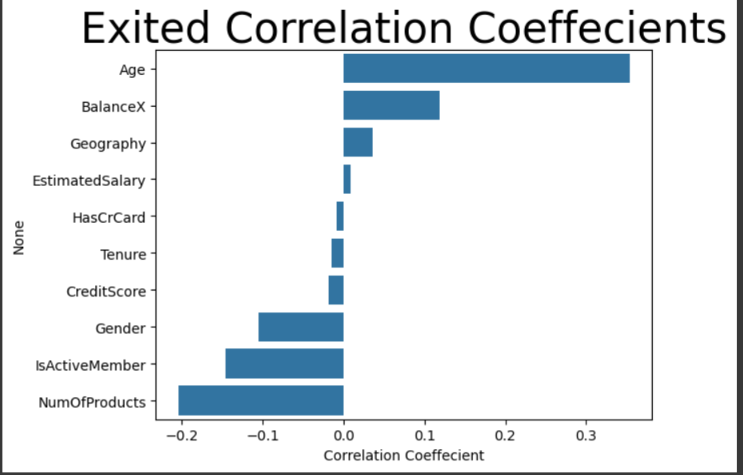

In [ ]:
X = df.drop(['Exited','EstimatedSalary','HasCrCard','Tenure','CreditScore'], axis=1)
y = df['Exited']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Regression Model  ( Supervised Machine Learning )

Applying the Regression  Algorithm

Putting all the Regression Models in the Dict named Models

In [ ]:
# Apply Regression  Learning Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor(max_iter=50)

}

We are running a loop through models and fitting our data fir each and everymodel , and for each and everymodel we are calculating the R2 Score , MSE ,RMSE and MAE .

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_proba = model.predict_proba(X_test)#[:, #0]

    results.append({
        'Model': model_name,

        'R2_score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2_score', ascending=False, inplace=True)

results_df

As R2_score is most important parameter for Regression so we have have an ascending order list . But this is not giving us Satisfying results

NOT Satisfactory Result but ALL THE ALgorithms Performance have Improved ( GREAT NEWS  )

# Classification Model  ( Supervised Machine Learning )

Putting all the Regression Models in the Dict named Models

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
# Apply Classification  Learning Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

\We are running a loop through models and fitting our data for each and everymodel , and for each and everymodel we are calculating the Accuracy , Recall , Precision , F1_score and ROC_AUC

In [ ]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 0]

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),

        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),

        'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr' , average='weighted' )
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)

results_df

As ROC-AUC and f1_score are  most important parameter for Regression so we have have an ascending order list . But this is not giving us Satisfying results

# Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = []

for model_name, model in models.items():         #fitting , predicting and probablity
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 0] if hasattr(model, "predict_proba") else None


    cm = confusion_matrix(y_test, y_pred)          # creating our C matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)  # displaying it


    disp.plot(cmap='Blues', ax=plt.gca())           # displaying the 6 graphs
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# GridSearch CV Hyper-parameter Tuning on Logistic Reg , Decision Tree and Random Forest

# Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
param_dist = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,None],
    'splitter':['best','random'],
    'max_features':[2,3, 4 ,5, 6],
    'min_samples_leaf':[10 ,15,18],
    'min_samples_split':[15 , 20 ,25],
    'max_leaf_nodes':[10,15,18]

}


In [ ]:

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_dist,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_    # this gives the best combination of the estimators

In [ ]:
grid.best_score_


In [ ]:

grid.best_params_

# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
param_grid = {
    'n_estimators': [150],
    'max_depth': [10,15],
    'criterion':['gini'],
    'max_features':[ 4 ,5, 6],
    'min_samples_leaf':[ 15,25],
    'min_samples_split':[15 , 25 ]
}

In [ ]:
rf_grid  = GridSearchCV(estimator=rf , param_grid=param_grid , cv=5 , verbose=2 , n_jobs=-1)

rf_grid.fit(X_train , y_train)

In [ ]:
grid.best_estimator_

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

# Logistic Regression

In [ ]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [ 0.01, 0.1, 1, 10],
    'solver' : ['lbfgs','sag','saga'],
    'max_iter' : [500, 1000,2000,5000]
}

In [ ]:
logr_grid  = GridSearchCV(estimator=logr , param_grid=param_grid , cv=5 , verbose=2 , n_jobs=-1)

logr_grid.fit(X_train , y_train)

In [ ]:
grid.best_estimator_

In [ ]:
logr_grid.best_params_

In [ ]:
logr_grid.best_score_